# Parallel Axis Plot

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib import patheffects as pe


In [2]:
# read in UC and DPS
uc = pd.read_csv('files/Uncontrolled_Historical.obj', sep=' ', names =  ['Hydropower', 'Environment', 'Recession', 'Sugar', 'Cotton'])
uc['source'] = 'Uncontrolled'
dps = pd.read_csv('files/DPS_ReferenceSet.reference', sep=' ', names =  ['Hydropower', 'Environment', 'Recession', 'Sugar', 'Cotton'])
dps['source'] = 'Optimized'

uc_dps_all = pd.concat([dps, uc])

In [3]:
def FindBetterPolicies(uc_dps_all, uc):
    pols = []
    for i in range(len(uc_dps_all.index)):
        better = True
        for col in uc_dps_all.columns.tolist():
            if uc_dps_all[col].iloc[i] > uc[col].iloc[0]:
                better = False
                break
        if better == True:
            pols.append(i)
            
    return pols  

In [4]:
better_pols = FindBetterPolicies(uc_dps_all, uc)

def PAP(ax, df, better_pols, title, lgd, cmap, brushed=True):
    
    cmap = matplotlib.cm.get_cmap(cmap)

    table = df[['Hydropower', 'Environment', 'Recession', 'Sugar', 'Cotton']]

    # Scale the data to minimum and maximum values 
    scaled = table.copy()
    for column in table.columns:
        if column != 'Source':
            mm = df[column].min()
            mx = df[column].max()
            scaled[column] = (table[column] - mm) / (mx - mm)
    
    # Plot all of the policies 
    d = 0
    u = 0
    for i,solution in enumerate(scaled.iterrows()):
        ys = solution[1]
        xs = range(len(ys - 1))
        if df['source'].iloc[i]=='Optimized':
            d +=1
            col = cmap(ys[1]) # shade by environmental objective
            ls = "solid"
            if d == 1:
                lbl = 'Optimized'
            else:
                lbl = ""
        else:
            u += 1
            col = 'black'
            ls = "dashed"
            if u == 1:
                lbl = 'Uncontrolled'
            else:
                lbl = ""
            
        if brushed == True:
            if i in better_pols:
                ax.plot(xs, ys, c=col, linewidth = 2, linestyle=ls, label=lbl)
            else:
                ax.plot(xs, ys, c=col, linewidth = 1, linestyle=ls, label=lbl, alpha=0.3)
        else:
            ax.plot(xs, ys, c=col, linewidth = 2, linestyle=ls, label=lbl)

    # Format the figure

    ax.annotate('', xy=(-0.14, 0.15), xycoords='axes fraction', xytext=(-0.14, 0.85),
        arrowprops=dict(arrowstyle="->", color='black'))

    ax.set_xticks(np.arange(0,np.shape(table)[1],1))
    ax.set_xlim([0,np.shape(table)[1]-1])
    ax.set_ylim([0,1])

    ax.set_ylabel("Scaled Objective Values",fontsize=16)
    # ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(["Hydropower", "Environment", "Recession", "Sugar", "Cotton"],fontsize=16)

    ax.tick_params(labelsize=14)
    ax.tick_params(axis='y',which='both',labelleft='off',left='off',right='off')
    ax.tick_params(axis='x',which='both',top='off',bottom='off')

    #cbar = fig.colorbar()
    #cbar.ax.set_xticklabels(['10','15','20','25','30'])
    #fig.axes[-1].set_xlabel('Scaled Environmental Flows Objective',fontsize=14)
    
    # make subplot frames invisible
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # draw in axes
    for i in np.arange(0,np.shape(table)[1],1):
        ax.plot([i,i],[0,1],c='k')

    # ax.set_title("Policy Source", size=18)
    ax.set_title(title)
    if lgd == True:
        ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)

## All Policies

In [5]:
fpath = './'

In [6]:
len(better_pols) / len(dps)

0.5306122448979592

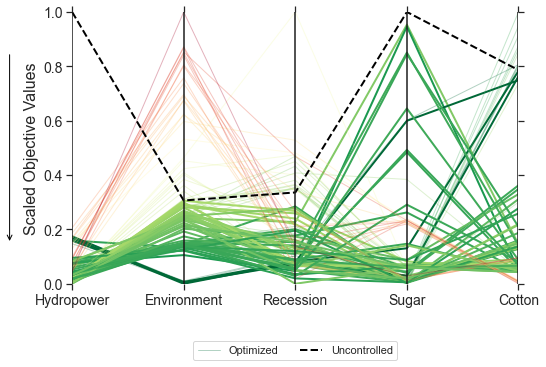

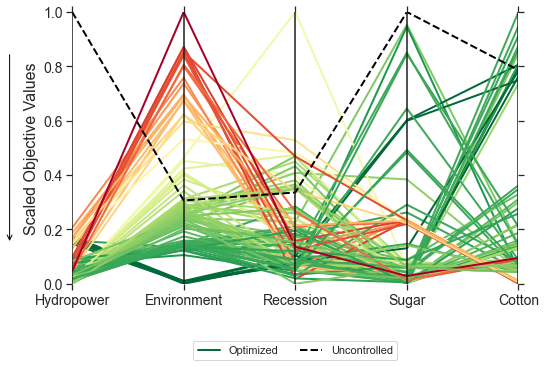

In [8]:

# find sources of combined Pareto Set 

sns.set(style="white")
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches([8, 5])

PAP(ax1, uc_dps_all, better_pols, "", True, "RdYlGn_r")

fig.savefig("Figures/BrushedSet.png")
plt.show()

sns.set(style="white")
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches([8, 5])

PAP(ax1, uc_dps_all, better_pols, "", True, "RdYlGn_r", False)

fig.savefig("Figures/UnbrushedSet.png")
fig.savefig("Figures/UnbrushedSet.pdf")
plt.show()


In [11]:
import string

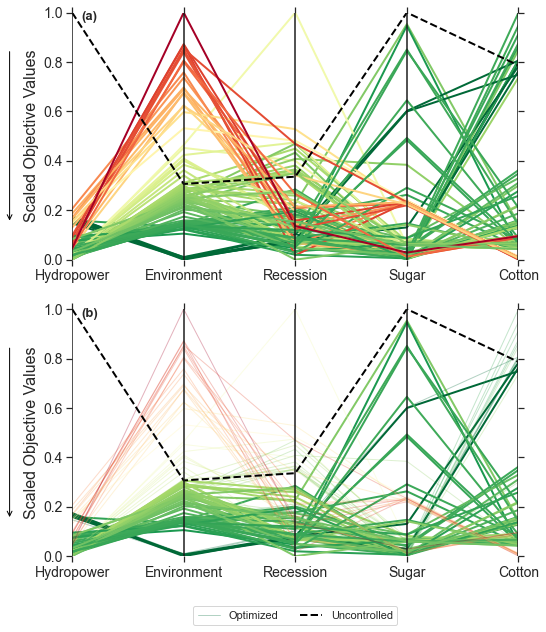

In [12]:
# find sources of combined Pareto Set 

sns.set(style="white")
fig, axs = plt.subplots(2, 1)
fig.set_size_inches([8, 10])

PAP(axs[1], uc_dps_all, better_pols, "", True, "RdYlGn_r")
PAP(axs[0], uc_dps_all, better_pols, "", True, "RdYlGn_r", False)

for ax, i in zip(axs, range(2)):
    ax.text(0.02, 0.97, "("+ string.ascii_lowercase[i] + ")", transform=ax.transAxes, size=13, weight='bold')

fig.savefig('Figures/BrushedAndUnbrushed.png')
fig.savefig('Figures/BrushedAndUnbrushed.svg')
fig.savefig('Figures/BrushedAndUnbrushed.pdf')
plt.show()

In [13]:
# brush even more 

In [14]:
from utilities import *

In [15]:
ROBUST_POLICY_INTEGERS = [int(p[1:]) for p in ROBUST_POLICY_LIST[:-1]]

In [16]:
ALL_ROBUST_POLICIES_INTEGERS = {}
for k in ALL_ROBUST_POLICIES.keys():
    l = ALL_ROBUST_POLICIES[k]
    li = [int(p[1:]) for p in l]
    ALL_ROBUST_POLICIES_INTEGERS[k] = li

In [17]:
COLOR_DICTIONARY

{'High Flow Policy': 0.75, 'Low Flow Policy': 0.25, 'Compromise Policy': 0.5}

In [18]:
ROBUST_POLICIES

{'Low Flow': 'P86', 'High Flow': 'P72', 'Compromise': 'P41', 'PUC': 'PUC'}

In [19]:
col_dict = {}
for key in ROBUST_POLICIES:
    if key != 'PUC':
        v = int(ROBUST_POLICIES[key][1:])
        c = COLOR_DICTIONARY[f'{key} Policy']
        col_dict[v] = c

In [20]:
col_dict

{86: 0.25, 72: 0.75, 41: 0.5}

In [21]:
ROBUST_POLICY_INTEGERS = [int(p[1:]) for p in ROBUST_POLICY_LIST[:-1]]

In [24]:
better_pols = FindBetterPolicies(uc_dps_all, uc)
cmap_brush = plt.cm.get_cmap("RdBu")


def PAP_policies(ax, df, better_pols, title, lgd, cmap, brushed=True, robust_brushed=True):
    
    cmap = matplotlib.cm.get_cmap(cmap)

    table = df[['Hydropower', 'Environment', 'Recession', 'Sugar', 'Cotton']]

    # Scale the data to minimum and maximum values 
    scaled = table.copy()
    for column in table.columns:
        if column != 'Source':
            mm = df[column].min()
            mx = df[column].max()
            scaled[column] = (table[column] - mm) / (mx - mm)
    
    # Plot all of the policies 
    d = 0
    u = 0
    for i,solution in enumerate(scaled.iterrows()):
        ys = solution[1]
        xs = range(len(ys - 1))
        if df['source'].iloc[i]=='Optimized':
            d +=1
            col = cmap(ys[1]) # shade by environmental objective
            ls = "solid"
            if d == 1:
                lbl = 'Optimized'
            else:
                lbl = ""
        else:
            u += 1
            col = 'black'
            ls = "dashed"
            if u == 1:
                lbl = 'Uncontrolled'
            else:
                lbl = ""
            
        ax.plot(xs, ys,
                c='black' if lbl=='Uncontrolled' else 'grey',
                linewidth = 2, linestyle=ls, label=lbl,
                alpha=1 if lbl == 'Uncontrolled' else 0)
        
        if robust_brushed == True:
            if i in ROBUST_POLICY_INTEGERS:
                ax.plot(xs, ys, c=cmap_brush(col_dict[i]), zorder=10, linewidth=4, 
                        path_effects=[pe.Stroke(linewidth=6, foreground='k'), pe.Normal()])
            
#             if i in ALL_ROBUST_POLICIES_INTEGERS['Low Flows']:
#                 ax.plot(xs, ys, c=cmap_brush(col_dict[72]), zorder=6, linewidth=1, alpha=0.7)
#             if i in ALL_ROBUST_POLICIES_INTEGERS['High Flows']:
#                 ax.plot(xs, ys, c=cmap_brush(col_dict[86]), zorder=5, linewidth=1, alpha=0.7)        
#             if i in ALL_ROBUST_POLICIES_INTEGERS['Both Policies']:
#                 ax.plot(xs, ys, c=cmap_brush(col_dict[41]), zorder=3, linewidth=1, alpha=0.7)
            

    # Format the figure

    ax.annotate('', xy=(-0.14, 0.15), xycoords='axes fraction', xytext=(-0.14, 0.85),
        arrowprops=dict(arrowstyle="->", color='black'))

    ax.set_xticks(np.arange(0,np.shape(table)[1],1))
    ax.set_xlim([0,np.shape(table)[1]-1])
    ax.set_ylim([0,1])

    ax.set_ylabel("Scaled Objective Values",fontsize=16)
    # ax.set_xticks([0,1,2,3,4])
    ax.set_xticklabels(["Hydropower", "Environment", "Recession", "Sugar", "Cotton"],fontsize=16)

    ax.tick_params(labelsize=14)
    ax.tick_params(axis='y',which='both',labelleft='off',left='off',right='off')
    ax.tick_params(axis='x',which='both',top='off',bottom='off')

    #cbar = fig.colorbar()
    #cbar.ax.set_xticklabels(['10','15','20','25','30'])
    #fig.axes[-1].set_xlabel('Scaled Environmental Flows Objective',fontsize=14)
    
    # make subplot frames invisible
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # draw in axes
    for i in np.arange(0,np.shape(table)[1],1):
        ax.plot([i,i],[0,1],c='k')

    # ax.set_title("Policy Source", size=18)
    ax.set_title(title)
    if lgd == True:
        ax.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=2)

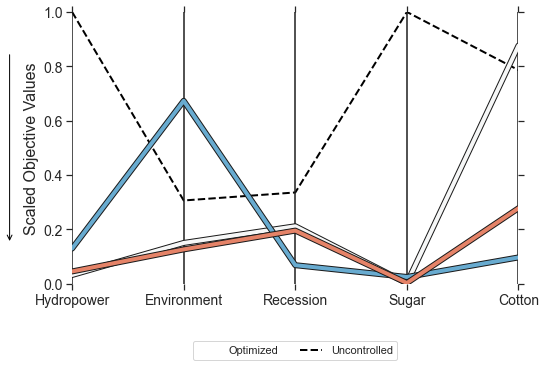

In [26]:
sns.set(style="white")
fig, (ax1) = plt.subplots(1, 1)
fig.set_size_inches([8, 5])

PAP_policies(ax1, uc_dps_all, better_pols, "", True, "RdYlGn_r", brushed=False)

fig.savefig("Figures/Robust_Policy_2.png")
fig.savefig("Figures/Robust_Policy_2.svg")
fig.savefig("Figures/Robust_Policy_2.pdf")